In [1]:
import pandas as pd
import numpy as np
import math
from scipy.spatial.distance import euclidean

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
def perplexity_plot(model, score_name):
    plt.plot(model.score_tracker[score_name].value)
    plt.title('Dependence Perlexity of iteration')
    plt.xlabel('number of iteration')
    plt.ylabel('Perlexity Score')

In [4]:
data = pd.read_csv('preprocessed_data_for_specificity_prediction.csv', index_col='id')

In [5]:
data

,info,specificity,attainable,time_bound,goal,vw_text,vw_ngram,vw_ngram_info,vw_ngram_info_labels
id,,,,,,,,,
0,"&РЕЗУЛЬТАТ_Да,_четко &ПЕРВЫЙ_ШАГ_Не_знаю,_с_че...",0,1,0,Развитие профессиональных навыков,0 |@unigram развитие:1 профессиональный:1 навы...,0 |@ngram развитие:1 профессиональный:1 навык:...,0 |@ngram развитие:1 профессиональный:1 навык:...,0 |@ngram развитие:1 профессиональный:1 навык:...
1,"&РЕЗУЛЬТАТ_Да,_четко &ТИП_ЦЕЛИ_Получить_знания...",1,1,1,Хочу стать выпускником президентской программы,1 |@unigram хотеть:1 стать:1 выпускник:1 прези...,1 |@ngram хотеть:1 стать:1 выпускник:1 президе...,1 |@ngram хотеть:1 стать:1 выпускник:1 президе...,1 |@ngram хотеть:1 стать:1 выпускник:1 президе...
2,"&РЕЗУЛЬТАТ_Да,_четко &ТИП_ЦЕЛИ_Получить_знания...",0,1,0,приобретение новых знаний,2 |@unigram приобретение:1 новый:1 знание:1,2 |@ngram приобретение:1 новый:1 знание:1 прио...,2 |@ngram приобретение:1 новый:1 знание:1 прио...,2 |@ngram приобретение:1 новый:1 знание:1 прио...
4,"&РЕЗУЛЬТАТ_Да,_четко &ТИП_ЦЕЛИ_Получить_знания...",0,0,0,мне хочется узнать о мире как можно больше за ...,4 |@unigram хотеться:1 узнать:1 мир:1 большой:...,4 |@ngram хотеться:1 узнать:1 мир:1 большой:1 ...,4 |@ngram хотеться:1 узнать:1 мир:1 большой:1 ...,4 |@ngram хотеться:1 узнать:1 мир:1 большой:1 ...
5,"&РЕЗУЛЬТАТ_Да,_четко &ТИП_ЦЕЛИ_Получить_знания...",0,1,0,Получение новых знаний,5 |@unigram получение:1 новый:1 знание:1,5 |@ngram получение:1 новый:1 знание:1 получен...,5 |@ngram получение:1 новый:1 знание:1 получен...,5 |@ngram получение:1 новый:1 знание:1 получен...
...,...,...,...,...,...,...,...,...,...
5995,"&РЕЗУЛЬТАТ_Да,_четко &ТИП_ЦЕЛИ_Получить_знания...",0,0,0,Постоянный личностный рост,5995 |@unigram постоянный:1 личностный:1 рост:1,5995 |@ngram постоянный:1 личностный:1 рост:1 ...,5995 |@ngram постоянный:1 личностный:1 рост:1 ...,5995 |@ngram постоянный:1 личностный:1 рост:1 ...
5996,"&РЕЗУЛЬТАТ_Да,_нечетко &ТИП_ЦЕЛИ_Получить_знан...",0,1,0,накопление компетенций,5996 |@unigram накопление:1 компетенция:1,5996 |@ngram накопление:1 компетенция:1,5996 |@ngram накопление:1 компетенция:1 |@inf...,5996 |@ngram накопление:1 компетенция:1 |@inf...
5997,"&РЕЗУЛЬТАТ_Да,_нечетко &ТИП_ЦЕЛИ_Получить_знан...",1,0,0,Разобраться в современных технологиях в образо...,5997 |@unigram разобраться:1 современный:1 тех...,5997 |@ngram разобраться:1 современный:1 техно...,5997 |@ngram разобраться:1 современный:1 техно...,5997 |@ngram разобраться:1 современный:1 техно...


In [6]:
titles = [goal.split()[0] for goal in data['vw_ngram_info_labels']]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data['vw_ngram_info_labels'], data['specificity'],
                                                    test_size=0.3, random_state=42,
                                                    stratify=data['specificity'])

X_train = X_train.sort_index()
X_test = X_test.sort_index()
y_train = y_train.sort_index()
y_test = y_test.sort_index()

In [8]:
train_d0_indices = []
train_d1_indices = []
for index in X_train.index:
    if data['specificity'].loc[index] == 0:
        train_d0_indices.append(index)
    else:
        train_d1_indices.append(index)
        
test_d0_indices = []
test_d1_indices = []
for index in X_test.index:
    if data['specificity'].loc[index] == 0:
        test_d0_indices.append(index)
    else:
        test_d1_indices.append(index)

In [9]:
vw_file_train_total = open('vw_documents_train_total.txt', 'w')
vw_file_test_total = open('vw_documents_test_total.txt', 'w')

for index, goal in X_train.iteritems():
    vw_file_train_total.write(goal+'\n')
    
for index, goal in X_test.iteritems():
    vw_file_test_total.write(goal[:goal.find(' |@specificity')]+'\n')

vw_file_train_total.close()
vw_file_test_total.close()

In [10]:
vw_file_train_d0 = open('vw_documents_train_d0.txt', 'w')
vw_file_train_d1 = open('vw_documents_train_d1.txt', 'w')
vw_file_test_d0 = open('vw_documents_test_d0.txt', 'w')
vw_file_test_d1 = open('vw_documents_test_d1.txt', 'w')

for index, goal in data.iterrows():
    if index in train_d0_indices:
        vw_file_train_d0.write(goal['vw_ngram_info_labels']+'\n')
    elif index in train_d1_indices:
        vw_file_train_d1.write(goal['vw_ngram_info_labels']+'\n')
    elif index in test_d0_indices:
        vw_file_test_d0.write(goal['vw_ngram_info']+'\n')
    else:
        vw_file_test_d1.write(goal['vw_ngram_info']+'\n')
        
vw_file_train_d0.close()
vw_file_train_d1.close()
vw_file_test_d0.close()
vw_file_test_d1.close()

In [11]:
import artm

import topicnet
from topicnet.cooking_machine.models import TopicModel
from topicnet.viewers import TopTokensViewer
from topicnet.viewers import TopDocumentsViewer
from topicnet.cooking_machine.dataset import Dataset

In [12]:
train_total_batch_vectorizer=artm.BatchVectorizer(data_path='vw_documents_train_total.txt',
                                                  data_format='vowpal_wabbit',
                                                  batch_size = 10000,
                                                  target_folder='./train_total_batches')

train_total_dictionary = train_total_batch_vectorizer.dictionary

In [13]:
train_d0_batch_vectorizer = artm.BatchVectorizer(data_path='vw_documents_train_d0.txt',
                                                 data_format='vowpal_wabbit',
                                                 batch_size = 10000,
                                                 target_folder='./train_d0_batches')

train_d0_dictionary = train_d0_batch_vectorizer.dictionary

In [14]:
train_d1_batch_vectorizer = artm.BatchVectorizer(data_path='vw_documents_train_d1.txt',
                                                 data_format='vowpal_wabbit',
                                                 batch_size = 10000,
                                                 target_folder='./train_d1_batches')

train_d1_dictionary = train_d1_batch_vectorizer.dictionary

Сначала соберем соберем необходимые словари

In [15]:
train_total_dictionary.save_text('train_total_dictionary.txt')
train_d1_dictionary.save_text('train_d1_dictionary.txt')
train_d0_dictionary.save_text('train_d0_dictionary.txt')

file_train_total_dictionary = open('train_total_dictionary.txt', 'r')
train_total_dict_ngram = []
train_total_dict_info = []
for line in file_train_total_dictionary.readlines():
    if '@ngram' in line.split(', '):
        train_total_dict_ngram.append(line.split(', ')[0])
    elif '@info' in line.split(', '):
        train_total_dict_info.append(line.split(', ')[0])
file_train_total_dictionary.close()

file_train_d1_dictionary = open('train_d1_dictionary.txt', 'r')
train_d1_dict_ngram = []
train_d1_dict_info = []
for line in file_train_d1_dictionary.readlines():
    if '@ngram' in line.split(', '):
        train_d1_dict_ngram.append(line.split(', ')[0])
    elif '@info' in line.split(', '):
        train_d1_dict_info.append(line.split(', ')[0])
file_train_d1_dictionary.close()

file_train_d0_dictionary = open('train_d0_dictionary.txt', 'r')
train_d0_dict_ngram = []
train_d0_dict_info = []
for line in file_train_d0_dictionary.readlines():
    if '@ngram' in line.split(', '):
        train_d0_dict_ngram.append(line.split(', ')[0])
    elif '@info' in line.split(', '):
        train_d0_dict_info.append(line.split(', ')[0])
file_train_d0_dictionary.close()

train_total_without_d0_dict_ngram = list(set(train_total_dict_ngram)-set(train_d0_dict_ngram))
train_total_without_d0_dict_info = list(set(train_total_dict_info)-set(train_d0_dict_info))
train_total_without_d0_dict = train_total_without_d0_dict_ngram + train_total_without_d0_dict_info

train_total_without_d1_dict_ngram = list(set(train_total_dict_ngram)-set(train_d1_dict_ngram))
train_total_without_d1_dict_info = list(set(train_total_dict_info)-set(train_d1_dict_info))
train_total_without_d1_dict = train_total_without_d1_dict_ngram + train_total_without_d1_dict_info

In [16]:
file = open('dictionary_train_total_without_d1.txt', 'w')
for token in train_total_without_d1_dict:
    file.write(token + '\n')
file.close()

dictionary_train_total_without_d1 = artm.Dictionary()
dictionary_train_total_without_d1.gather(data_path='./train_total_batches',
                                         vocab_file_path='dictionary_train_total_without_d1.txt')

In [17]:
train_total_vocabulary = train_d0_dict_ngram + train_total_without_d0_dict_ngram + train_d0_dict_info + train_total_without_d0_dict_info + ['0', '1']
vocab_file = open('train_total_vocabulary.txt', 'w')
for token in train_total_vocabulary:
    vocab_file.write(token + '\n')
vocab_file.close()

train_total_dictionary = artm.Dictionary()
train_total_dictionary.gather(data_path='./train_total_batches',
                              vocab_file_path='./train_total_vocabulary')

In [18]:
dataset = Dataset('preprocessed_data_for_TopicNet.csv')

## ПОДБИРАЕМ ПО СЕТКЕ ПАРАМЕТРЫ МОДЕЛИ

Попробую инициализировать Ф00 случайными числами.

In [19]:
num_not_sp = 3
num_sp = 6

not_specific_topics = ['topic_{}'.format(i) for i in range(num_not_sp)]
specific_topics = ['topic_{}'.format(i+num_not_sp) for i in range(num_sp)]
topic_names = not_specific_topics + specific_topics

raw_model = artm.ARTM(num_topics=len(topic_names),
                  num_processors=7,
                  show_progress_bars=True,
                  class_ids={'@ngram':10,
                             '@info':1,
                             '@specificity':90},
                  cache_theta=True,
                  dictionary=train_total_dictionary)

In [20]:
raw_model.save('raw_model')

In [21]:
np.random.seed(77)

#для @ngram
phi_00 = pd.DataFrame(data=np.random.uniform(0, 0.1, size=(len(train_d0_dict_ngram), len(not_specific_topics))),
                      index=train_d0_dict_ngram,
                      columns=not_specific_topics)
phi_10 = pd.DataFrame(data=np.zeros((len(train_total_without_d0_dict_ngram), phi_00.columns.shape[0])),
                      index=train_total_without_d0_dict_ngram,
                      columns=phi_00.columns)
phi_01 = pd.DataFrame(data=np.random.uniform(0, 0.01, size=(phi_00.index.shape[0], len(specific_topics))),
                      index=phi_00.index,
                      columns=specific_topics)
phi_11 = pd.DataFrame(data=np.random.uniform(0, 1, size=(phi_10.index.shape[0], len(specific_topics))),
                      index=phi_10.index,
                      columns=specific_topics)
phi_0 = phi_00.append(phi_10)
phi_1 = phi_01.append(phi_11)
for column in phi_0.columns:
    phi_0[column] = phi_0[column].apply(lambda item: item/phi_0[column].sum())
for column in phi_1.columns:
    phi_1[column] = phi_1[column].apply(lambda item: item/phi_1[column].sum())
phi_ngram = pd.concat([phi_00.append(phi_10), phi_1], axis=1)

#для @info
phi_00_info = pd.DataFrame(data=np.random.uniform(0, 0.1, size=(len(train_d0_dict_info), len(not_specific_topics))),
                      index=train_d0_dict_info,
                      columns=not_specific_topics)
phi_10_info = pd.DataFrame(data=np.zeros((len(train_total_without_d0_dict_info), phi_00.columns.shape[0])),
                           index=train_total_without_d0_dict_info,
                           columns=phi_00.columns)
phi_01_info = pd.DataFrame(data=np.random.uniform(0, 0.01, size=(phi_00_info.index.shape[0], len(specific_topics))),
                           index=phi_00_info.index,
                           columns=specific_topics)
phi_11_info = pd.DataFrame(data=np.random.uniform(0, 1, size=(phi_10_info.index.shape[0], len(specific_topics))),
                           index=phi_10_info.index,
                           columns=specific_topics)
phi_0_info = phi_00_info.append(phi_10_info)
phi_1_info = phi_01_info.append(phi_11_info)
for column in phi_0_info.columns:
    phi_0_info[column] = phi_0_info[column].apply(lambda item: item/phi_0_info[column].sum())
for column in phi_1_info.columns:
    phi_1_info[column] = phi_1_info[column].apply(lambda item: item/phi_1_info[column].sum())
phi_info = pd.concat([phi_00_info.append(phi_10_info), phi_1_info], axis=1)

#для @specifisity
c_00 = pd.DataFrame(data=np.ones((1, phi_00.columns.shape[0])),
                      index=['0'],
                      columns=phi_00.columns)
c_10 = pd.DataFrame(data=np.zeros((1, phi_00.columns.shape[0])),
                      index=['1'],
                      columns=phi_00.columns)
c_01 = pd.DataFrame(data=np.zeros((1, phi_01.columns.shape[0])),
                      index=['0'],
                      columns=phi_01.columns)
c_11 = pd.DataFrame(data=np.ones((1, phi_01.columns.shape[0])),
                      index=['1'],
                      columns=phi_01.columns)

phi_specifisity = pd.concat([c_00.append(c_10), c_01.append(c_11)], axis=1)
new_phi = phi_ngram.append(phi_info).append(phi_specifisity)

In [22]:
test_total_batch_vectorizer=artm.BatchVectorizer(data_path='vw_documents_test_total.txt',
                                                 data_format='vowpal_wabbit',
                                                 batch_size = 10000,
                                                 target_folder='./test_total_batches')

test_total_dictionary = test_total_batch_vectorizer.dictionary

In [23]:
scores_name = ['tau_Smooth_Phi00_ngram', 'tau_Smooth_Phi00_info',
               'tau_Smooth_Phi00_specificity', 'num_not_sp', 'num_sp',
               'weight_ngram', 'weight_info', 'weight_specificity',
               'roc_auc', 'precision', 'recall', 'accuracy']
metrics = pd.DataFrame(columns=scores_name)

In [24]:
NUM_NOT_SPECIFIC_TOPICS = [3]
NUM_SPECIFIC_TOPICS = [6]
grid_weight_ngram = [8.2]
grid_weight_info = [0.6]
grid_weight_specificity = [64.5]
grid_Smooth_Phi00_ngram = [1800]
grid_Smooth_Phi00_info = [1]
grid_Smooth_Phi00_specificity = [0]

param_index = pd.DataFrame(columns=['tau_Smooth_Phi00_ngram', 'tau_Smooth_Phi00_info',
                                    'tau_Smooth_Phi00_specificity', 'num_not_sp', 'num_sp', 'weight_ngram',
                                    'weight_info', 'weight_specificity'])
index=0
x_0 = []
y_0 = []
y_pred_proba_0 = []
T_0 = []

for tau_Smooth_Phi00_ngram in grid_Smooth_Phi00_ngram:
    for tau_Smooth_Phi00_info in grid_Smooth_Phi00_info:
        for tau_Smooth_Phi00_specificity in grid_Smooth_Phi00_specificity:
            for num_not_sp in NUM_NOT_SPECIFIC_TOPICS:
                for num_sp in NUM_SPECIFIC_TOPICS:
                    for weight_ngram in grid_weight_ngram:
                        for weight_info in grid_weight_info:
                            for weight_specificity in grid_weight_specificity:
                                param_index.loc[index] = [tau_Smooth_Phi00_ngram, tau_Smooth_Phi00_info, tau_Smooth_Phi00_specificity, num_not_sp, num_sp, weight_ngram, weight_info, weight_specificity]
                                print(index)

                                not_specific_topics = ['topic_{}'.format(i) for i in range(num_not_sp)]
                                specific_topics = ['topic_{}'.format(i+num_not_sp) for i in range(num_sp)]
                                topic_names = not_specific_topics + specific_topics

                                ### Создадим модель
                                model = artm.ARTM(num_topics=len(topic_names),
                                                  num_processors=7,
                                                  show_progress_bars=True,
                                                  class_ids={'@ngram':weight_ngram,
                                                             '@info':weight_info,
                                                             '@specificity':weight_specificity},
                                                  cache_theta=True,
                                                  seed=42,
                                                  dictionary=train_total_dictionary)
                                
                                #model.load('raw_model')
                                model.class_ids['@ngram'] = weight_ngram
                                model.class_ids['@info'] = weight_info
                                model.class_ids['@specificity'] = weight_specificity


                                new_best_phi = pd.DataFrame(columns = topic_names)
                                for token in model.get_phi().index:
                                    new_best_phi.loc[token] = new_phi.loc[token]

                                (_, phi_ref) = model.master.attach_model(model=model.model_pwt)
                                np.copyto(phi_ref, new_best_phi.values)

                                model.scores.add(artm.PerplexityScore(name='PerlexityScore_ngram', class_ids=['@ngram']))
                                model.scores.add(artm.PerplexityScore(name='PerlexityScore_info', class_ids=['@info']))
                                model.scores.add(artm.PerplexityScore(name='PerlexityScore_specificity', class_ids=['@specificity']))
                                model.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore_ngram', class_id='@ngram'))
                                model.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore_info', class_id='@info'))
                                model.scores.add(artm.SparsityThetaScore(name='SparsityThetaScore'))
                                model.scores.add(artm.TopTokensScore(name='TopTokensScore', num_tokens=10, class_id='@ngram'))
                                model.scores.add(artm.BackgroundTokensRatioScore(name='BackgroundTokensRatioScore',
                                                                                    class_id='@ngram'))

                                # Сглаживание Ф00

                                model.regularizers.add(artm.SmoothSparsePhiRegularizer(name='Smooth_Phi00_Regularizer_ngram',
                                                                                       tau = tau_Smooth_Phi00_ngram,
                                                                                       class_ids = ['@ngram'],
                                                                                       topic_names=not_specific_topics,
                                                                                       dictionary=train_d0_dictionary))

                                model.regularizers.add(artm.SmoothSparsePhiRegularizer(name='Smooth_Phi00_Regularizer_info',
                                                                                       tau = tau_Smooth_Phi00_info,
                                                                                       class_ids = ['@info'],
                                                                                       topic_names=not_specific_topics,
                                                                                       dictionary=train_d0_dictionary))

                                model.regularizers.add(artm.SmoothSparsePhiRegularizer(name='Smooth_Phi00_Regularizer_specificity',
                                                                                       tau = tau_Smooth_Phi00_specificity,
                                                                                       class_ids = ['@specificity'],
                                                                                       topic_names=not_specific_topics,
                                                                                       dictionary=train_d0_dictionary))

                                model.fit_offline(batch_vectorizer=train_total_batch_vectorizer, num_collection_passes=20)

                                theta_test = model.transform(batch_vectorizer=test_total_batch_vectorizer)
                                p_cd_test = model.transform(batch_vectorizer=test_total_batch_vectorizer,
                                                            predict_class_id='@specificity')

                                y_pred_proba = p_cd_test.loc['1']
                                fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

                                dist_min = math.inf
                                for x, y, treshold in zip(fpr, tpr, thresholds):
                                    if euclidean([0, 1], [x, y]) < dist_min:
                                        T_artm = treshold
                                        dist_min = euclidean([0, 1], [x, y])
                                        x_artm = x
                                        y_artm = y

                                y_pred_labels = []
                                for document in p_cd_test.columns:
                                    if p_cd_test[document].loc['1'] >= T_artm:
                                        y_pred_labels.append(1)
                                    else:
                                        y_pred_labels.append(0)

                                roc_auc = roc_auc_score(y_test, p_cd_test.loc['1'])
                                precision = precision_score(y_test, y_pred_labels)
                                recall = recall_score(y_test, y_pred_labels)
                                accuracy = accuracy_score(y_test, y_pred_labels)

                                x_0.append(x_artm)
                                y_0.append(y_artm)
                                y_pred_proba_0.append(y_pred_proba)
                                T_0.append(T_artm)

                                topic_model = TopicModel(model)
                                param_index.loc[index] = [tau_Smooth_Phi00_ngram, tau_Smooth_Phi00_info, tau_Smooth_Phi00_specificity, num_not_sp, num_sp, weight_ngram, weight_info, weight_specificity]
                                metrics.loc[index] = [tau_Smooth_Phi00_ngram, tau_Smooth_Phi00_info, tau_Smooth_Phi00_specificity, num_not_sp, num_sp, weight_ngram, weight_info, weight_specificity, roc_auc, precision, recall, accuracy]
                                print(metrics.loc[index])
                                index += 1

0


tau_Smooth_Phi00_ngram          1800.000000
tau_Smooth_Phi00_info              1.000000
tau_Smooth_Phi00_specificity       0.000000
num_not_sp                         3.000000
num_sp                             6.000000
weight_ngram                       8.200000
weight_info                        0.600000
weight_specificity                64.500000
roc_auc                            0.850467
precision                          0.711538
recall                             0.834586
accuracy                           0.774714
Name: 0, dtype: float64


In [25]:
metrics

,tau_Smooth_Phi00_ngram,tau_Smooth_Phi00_info,tau_Smooth_Phi00_specificity,num_not_sp,num_sp,weight_ngram,weight_info,weight_specificity,roc_auc,precision,recall,accuracy
0,1800.0,1.0,0.0,3.0,6.0,8.2,0.6,64.5,0.850467,0.711538,0.834586,0.774714


In [26]:
metrics['roc_auc'].max()

0.8504674093994109

In [27]:
indecies = []
for num in metrics.index:
    if metrics['roc_auc'].loc[num] > 0.85:
        indecies.append(num)

In [28]:
metrics.loc[indecies]

,tau_Smooth_Phi00_ngram,tau_Smooth_Phi00_info,tau_Smooth_Phi00_specificity,num_not_sp,num_sp,weight_ngram,weight_info,weight_specificity,roc_auc,precision,recall,accuracy
0,1800.0,1.0,0.0,3.0,6.0,8.2,0.6,64.5,0.850467,0.711538,0.834586,0.774714


In [29]:
import collections
print('num_not_sp', collections.Counter(param_index.loc[indecies]['num_not_sp']))
print('num_sp', collections.Counter(param_index.loc[indecies]['num_sp']))
print('weight_ngram', collections.Counter(param_index.loc[indecies]['weight_ngram']))
print('weight_info', collections.Counter(param_index.loc[indecies]['weight_info']))
print('weight_specificity', collections.Counter(param_index.loc[indecies]['weight_specificity']))

num_not_sp Counter({3.0: 1})
num_sp Counter({6.0: 1})
weight_ngram Counter({8.2: 1})
weight_info Counter({0.6: 1})
weight_specificity Counter({64.5: 1})


Лучшие параметры:

* num_not_sp              4
* num_sp                 10
* weight_ngram           10
* weight_info             1
* weight_specificity    100

# Построим лучшую модель c лучшими параметрами

In [35]:
num_not_sp = 3
num_sp = 6
weight_ngram = 8.2
weight_info = 0.6
weight_specificity = 64.5
tau_Smooth_Phi00_ngram = 1800
tau_Smooth_Phi00_info = 1
tau_Smooth_Phi00_specificity = 0

not_specific_topics = ['topic_{}'.format(i) for i in range(num_not_sp)]
specific_topics = ['topic_{}'.format(i+num_not_sp) for i in range(num_sp)]
topic_names = not_specific_topics + specific_topics

In [36]:
# not_specific_topics = ['topic_{}'.format(i) for i in range(num_not_sp)]
# specific_topics = ['topic_{}'.format(i+num_not_sp) for i in range(num_sp)]
# topic_names = not_specific_topics + specific_topics

# # составим матрицу Фи
# # для @ngram
# phi_00 = pd.DataFrame(data=np.random.uniform(0, 0.1, size=(len(train_d0_dict_ngram), len(not_specific_topics))),
#                       index=train_d0_dict_ngram,
#                       columns=not_specific_topics)
# phi_10 = pd.DataFrame(data=np.zeros((len(train_total_without_d0_dict_ngram), phi_00.columns.shape[0])),
#                       index=train_total_without_d0_dict_ngram,
#                       columns=phi_00.columns)
# phi_01 = pd.DataFrame(data=np.random.uniform(0, 0.01, size=(phi_00.index.shape[0], len(specific_topics))),
#                       index=phi_00.index,
#                       columns=specific_topics)
# phi_11 = pd.DataFrame(data=np.random.uniform(0, 1, size=(phi_10.index.shape[0], len(specific_topics))),
#                       index=phi_10.index,
#                       columns=specific_topics)
# phi_0 = phi_00.append(phi_10)
# phi_1 = phi_01.append(phi_11)
# for column in phi_0.columns:
#     phi_0[column] = phi_0[column].apply(lambda item: item/phi_0[column].sum())
# for column in phi_1.columns:
#     phi_1[column] = phi_1[column].apply(lambda item: item/phi_1[column].sum())
# phi_ngram = pd.concat([phi_00.append(phi_10), phi_1], axis=1)

# #для @info
# phi_00_info = pd.DataFrame(data=np.random.uniform(0, 0.1, size=(len(train_d0_dict_info), len(not_specific_topics))),
#                       index=train_d0_dict_info,
#                       columns=not_specific_topics)
# phi_10_info = pd.DataFrame(data=np.zeros((len(train_total_without_d0_dict_info), phi_00.columns.shape[0])),
#                            index=train_total_without_d0_dict_info,
#                            columns=phi_00.columns)
# phi_01_info = pd.DataFrame(data=np.random.uniform(0, 0.01, size=(phi_00_info.index.shape[0], len(specific_topics))),
#                            index=phi_00_info.index,
#                            columns=specific_topics)
# phi_11_info = pd.DataFrame(data=np.random.uniform(0, 1, size=(phi_10_info.index.shape[0], len(specific_topics))),
#                            index=phi_10_info.index,
#                            columns=specific_topics)
# phi_0_info = phi_00_info.append(phi_10_info)
# phi_1_info = phi_01_info.append(phi_11_info)
# for column in phi_0_info.columns:
#     phi_0_info[column] = phi_0_info[column].apply(lambda item: item/phi_0_info[column].sum())
# for column in phi_1_info.columns:
#     phi_1_info[column] = phi_1_info[column].apply(lambda item: item/phi_1_info[column].sum())
# phi_info = pd.concat([phi_00_info.append(phi_10_info), phi_1_info], axis=1)

# #для @specifisity
# c_00 = pd.DataFrame(data=np.ones((1, phi_00.columns.shape[0])),
#                       index=['0'],
#                       columns=phi_00.columns)
# c_10 = pd.DataFrame(data=np.zeros((1, phi_00.columns.shape[0])),
#                       index=['1'],
#                       columns=phi_00.columns)
# c_01 = pd.DataFrame(data=np.zeros((1, phi_01.columns.shape[0])),
#                       index=['0'],
#                       columns=phi_01.columns)
# c_11 = pd.DataFrame(data=np.ones((1, phi_01.columns.shape[0])),
#                       index=['1'],
#                       columns=phi_01.columns)

# phi_specifisity = pd.concat([c_00.append(c_10), c_01.append(c_11)], axis=1)
# new_phi = phi_ngram.append(phi_info).append(phi_specifisity)

### Создадим модель

best_first_model = artm.ARTM(num_topics=len(topic_names),
                             num_processors=7,
                             theta_columns_naming='title',
                             show_progress_bars=True,
                             class_ids={'@ngram':weight_ngram,
                                        '@info':weight_info,
                                        '@specificity':weight_specificity},
                             cache_theta=True,
                             seed=42,
                             dictionary=train_total_dictionary)

new_best_phi = pd.DataFrame(columns = topic_names)
for token in best_first_model.get_phi().index:
    new_best_phi.loc[token] = new_phi.loc[token]

(_, phi_ref) = best_first_model.master.attach_model(model=best_first_model.model_pwt)
np.copyto(phi_ref, new_best_phi.values)

best_first_model.scores.add(artm.PerplexityScore(name='PerlexityScore_ngram', class_ids=['@ngram']))
best_first_model.scores.add(artm.PerplexityScore(name='PerlexityScore_info', class_ids=['@info']))
best_first_model.scores.add(artm.PerplexityScore(name='PerlexityScore_specificity', class_ids=['@specificity']))
best_first_model.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore_ngram', class_id='@ngram'))
best_first_model.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore_info', class_id='@info'))
best_first_model.scores.add(artm.SparsityThetaScore(name='SparsityThetaScore'))
best_first_model.scores.add(artm.TopTokensScore(name='TopTokensScore', num_tokens=10, class_id='@ngram'))
best_first_model.scores.add(artm.BackgroundTokensRatioScore(name='BackgroundTokensRatioScore',
                                                    class_id='@ngram'))

# Сглаживание Ф00
best_first_model.regularizers.add(artm.SmoothSparsePhiRegularizer(name='Smooth_Phi00_Regularizer_ngram',
                                                       tau = tau_Smooth_Phi00_ngram,
                                                       class_ids = ['@ngram'],
                                                       topic_names=not_specific_topics,
                                                       dictionary=train_d0_dictionary))

best_first_model.regularizers.add(artm.SmoothSparsePhiRegularizer(name='Smooth_Phi00_Regularizer_info',
                                                       tau = tau_Smooth_Phi00_info,
                                                       class_ids = ['@info'],
                                                       topic_names=not_specific_topics,
                                                       dictionary=train_d0_dictionary))

best_first_model.regularizers.add(artm.SmoothSparsePhiRegularizer(name='Smooth_Phi00_Regularizer_specificity',
                                                       tau = tau_Smooth_Phi00_specificity,
                                                       class_ids = ['@specificity'],
                                                       topic_names=not_specific_topics,
                                                       dictionary=train_d0_dictionary))

best_first_model.fit_offline(batch_vectorizer=train_total_batch_vectorizer, num_collection_passes=30)

# test_total_batch_vectorizer=artm.BatchVectorizer(data_path='vw_documents_test_total.txt',
#                                                  data_format='vowpal_wabbit',
#                                                  batch_size = 10000,
#                                                  target_folder='./test_total_batches')

# test_total_dictionary = test_total_batch_vectorizer.dictionary
theta_test = best_first_model.transform(batch_vectorizer=test_total_batch_vectorizer)
p_cd_test = best_first_model.transform(batch_vectorizer=test_total_batch_vectorizer,
                                       predict_class_id='@specificity')

y_pred_proba = p_cd_test.loc['1']
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

dist_min = math.inf
for x, y, treshold in zip(fpr, tpr, thresholds):
    if euclidean([0, 1], [x, y]) < dist_min:
        T_artm = treshold
        dist_min = euclidean([0, 1], [x, y])
        x_artm = x
        y_artm = y

y_pred_labels = []
for document in p_cd_test.columns:
    if p_cd_test[document].loc['1'] >= T_artm:
        y_pred_labels.append(1)
    else:
        y_pred_labels.append(0)

roc_auc = roc_auc_score(y_test, p_cd_test.loc['1'])
precision = precision_score(y_test, y_pred_labels)
recall = recall_score(y_test, y_pred_labels)
accuracy = accuracy_score(y_test, y_pred_labels)

topic_model = TopicModel(best_first_model)

In [32]:
np.random.seed(77)



#для @ngram
phi_00 = pd.DataFrame(data=np.random.uniform(0, 0.1, size=(len(train_d0_dict_ngram), len(not_specific_topics))),
                      index=train_d0_dict_ngram,
                      columns=not_specific_topics)
phi_10 = pd.DataFrame(data=np.zeros((len(train_total_without_d0_dict_ngram), phi_00.columns.shape[0])),
                      index=train_total_without_d0_dict_ngram,
                      columns=phi_00.columns)
phi_01 = pd.DataFrame(data=np.random.uniform(0, 0.01, size=(phi_00.index.shape[0], len(specific_topics))),
                      index=phi_00.index,
                      columns=specific_topics)
phi_11 = pd.DataFrame(data=np.random.uniform(0, 1, size=(phi_10.index.shape[0], len(specific_topics))),
                      index=phi_10.index,
                      columns=specific_topics)
phi_0 = phi_00.append(phi_10)
phi_1 = phi_01.append(phi_11)
for column in phi_0.columns:
    phi_0[column] = phi_0[column].apply(lambda item: item/phi_0[column].sum())
for column in phi_1.columns:
    phi_1[column] = phi_1[column].apply(lambda item: item/phi_1[column].sum())
phi_ngram = pd.concat([phi_00.append(phi_10), phi_1], axis=1)

#для @info
phi_00_info = pd.DataFrame(data=np.random.uniform(0, 0.1, size=(len(train_d0_dict_info), len(not_specific_topics))),
                      index=train_d0_dict_info,
                      columns=not_specific_topics)
phi_10_info = pd.DataFrame(data=np.zeros((len(train_total_without_d0_dict_info), phi_00.columns.shape[0])),
                           index=train_total_without_d0_dict_info,
                           columns=phi_00.columns)
phi_01_info = pd.DataFrame(data=np.random.uniform(0, 0.01, size=(phi_00_info.index.shape[0], len(specific_topics))),
                           index=phi_00_info.index,
                           columns=specific_topics)
phi_11_info = pd.DataFrame(data=np.random.uniform(0, 1, size=(phi_10_info.index.shape[0], len(specific_topics))),
                           index=phi_10_info.index,
                           columns=specific_topics)
phi_0_info = phi_00_info.append(phi_10_info)
phi_1_info = phi_01_info.append(phi_11_info)
for column in phi_0_info.columns:
    phi_0_info[column] = phi_0_info[column].apply(lambda item: item/phi_0_info[column].sum())
for column in phi_1_info.columns:
    phi_1_info[column] = phi_1_info[column].apply(lambda item: item/phi_1_info[column].sum())
phi_info = pd.concat([phi_00_info.append(phi_10_info), phi_1_info], axis=1)

#для @specifisity
c_00 = pd.DataFrame(data=np.ones((1, phi_00.columns.shape[0])),
                      index=['0'],
                      columns=phi_00.columns)
c_10 = pd.DataFrame(data=np.zeros((1, phi_00.columns.shape[0])),
                      index=['1'],
                      columns=phi_00.columns)
c_01 = pd.DataFrame(data=np.zeros((1, phi_01.columns.shape[0])),
                      index=['0'],
                      columns=phi_01.columns)
c_11 = pd.DataFrame(data=np.ones((1, phi_01.columns.shape[0])),
                      index=['1'],
                      columns=phi_01.columns)

phi_specifisity = pd.concat([c_00.append(c_10), c_01.append(c_11)], axis=1)
new_phi = phi_ngram.append(phi_info).append(phi_specifisity)

### Создадим модель
model = artm.ARTM(num_topics=len(topic_names),
                  num_processors=7,
                  show_progress_bars=True,
                  class_ids={'@ngram':weight_ngram,
                             '@info':weight_info,
                             '@specificity':weight_specificity},
                  cache_theta=True,
                  seed=42,
                  dictionary=train_total_dictionary)

#model.load('raw_model')
model.class_ids['@ngram'] = weight_ngram
model.class_ids['@info'] = weight_info
model.class_ids['@specificity'] = weight_specificity


new_best_phi = pd.DataFrame(columns = topic_names)
for token in model.get_phi().index:
    new_best_phi.loc[token] = new_phi.loc[token]

(_, phi_ref) = model.master.attach_model(model=model.model_pwt)
np.copyto(phi_ref, new_best_phi.values)

model.scores.add(artm.PerplexityScore(name='PerlexityScore_ngram', class_ids=['@ngram']))
model.scores.add(artm.PerplexityScore(name='PerlexityScore_info', class_ids=['@info']))
model.scores.add(artm.PerplexityScore(name='PerlexityScore_specificity', class_ids=['@specificity']))
model.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore_ngram', class_id='@ngram'))
model.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore_info', class_id='@info'))
model.scores.add(artm.SparsityThetaScore(name='SparsityThetaScore'))
model.scores.add(artm.TopTokensScore(name='TopTokensScore', num_tokens=10, class_id='@ngram'))
model.scores.add(artm.BackgroundTokensRatioScore(name='BackgroundTokensRatioScore',
                                                    class_id='@ngram'))

# Сглаживание Ф00

model.regularizers.add(artm.SmoothSparsePhiRegularizer(name='Smooth_Phi00_Regularizer_ngram',
                                                       tau = tau_Smooth_Phi00_ngram,
                                                       class_ids = ['@ngram'],
                                                       topic_names=not_specific_topics,
                                                       dictionary=train_d0_dictionary))

model.regularizers.add(artm.SmoothSparsePhiRegularizer(name='Smooth_Phi00_Regularizer_info',
                                                       tau = tau_Smooth_Phi00_info,
                                                       class_ids = ['@info'],
                                                       topic_names=not_specific_topics,
                                                       dictionary=train_d0_dictionary))

model.regularizers.add(artm.SmoothSparsePhiRegularizer(name='Smooth_Phi00_Regularizer_specificity',
                                                       tau = tau_Smooth_Phi00_specificity,
                                                       class_ids = ['@specificity'],
                                                       topic_names=not_specific_topics,
                                                       dictionary=train_d0_dictionary))

model.fit_offline(batch_vectorizer=train_total_batch_vectorizer, num_collection_passes=20)

theta_test = model.transform(batch_vectorizer=test_total_batch_vectorizer)
p_cd_test = model.transform(batch_vectorizer=test_total_batch_vectorizer,
                            predict_class_id='@specificity')

y_pred_proba = p_cd_test.loc['1']
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

dist_min = math.inf
for x, y, treshold in zip(fpr, tpr, thresholds):
    if euclidean([0, 1], [x, y]) < dist_min:
        T_artm = treshold
        dist_min = euclidean([0, 1], [x, y])
        x_artm = x
        y_artm = y

y_pred_labels = []
for document in p_cd_test.columns:
    if p_cd_test[document].loc['1'] >= T_artm:
        y_pred_labels.append(1)
    else:
        y_pred_labels.append(0)

roc_auc = roc_auc_score(y_test, p_cd_test.loc['1'])
precision = precision_score(y_test, y_pred_labels)
recall = recall_score(y_test, y_pred_labels)
accuracy = accuracy_score(y_test, y_pred_labels)

x_0.append(x_artm)
y_0.append(y_artm)
y_pred_proba_0.append(y_pred_proba)
T_0.append(T_artm)

topic_model = TopicModel(model)

In [37]:
results = pd.DataFrame(index=['roc_auc', 'precision', 'recall', 'accuracy'])
results['до регуляризации'] = [roc_auc, precision, recall, accuracy]

In [38]:
results

,до регуляризации
roc_auc,0.849898
precision,0.706700
recall,0.840602
accuracy,0.772697


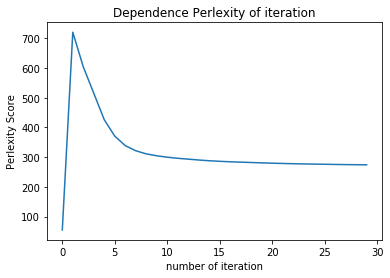

In [35]:
perplexity_plot(best_first_model, 'PerlexityScore_ngram')

In [1105]:
file = open('./tables/metrics_before_reg_results.txt', 'w')
file.write(results.to_latex())
file.close()

In [1106]:
topic_model = TopicModel(best_first_model)
topic_model.describe_scores()

last_value
model_id                   score_name                                 
--07h48m10s_12d06m2020y--- PerlexityScore_ngram                272.051
                           PerlexityScore_info                 43.6773
                           PerlexityScore_specificity          1.03009
                           SparsityPhiScore_ngram             0.676354
                           SparsityPhiScore_info              0.107178
                           SparsityThetaScore                 0.175349
                           TopTokensScore.average_coherence          0
                           TopTokensScore.num_tokens                90
                           BackgroundTokensRatioScore         0.297764

[-0.1, 1.1, -0.1, 1.1]

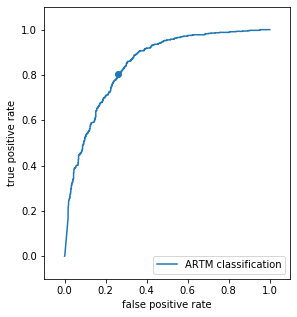

In [38]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
for x, y, actual, predicted, descr in zip([x_artm],
                                    [y_artm],
                                    [y_test], 
                                    [y_pred_proba],
                                    ["ARTM classification"]):
    fpr, tpr, thr = roc_curve(actual, predicted)
    plt.plot(fpr, tpr, label=descr)
    plt.scatter(x, y)
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc=4)
plt.axis([-0.1, 1.1, -0.1, 1.1])

# ПОДБИРАЕМ ПО СЕТКЕ КОЭФФИЦИЕНТЫ РЕГУЛЯРИЗАЦИИ

Добавим регуляризаторы

In [39]:
model = best_first_model.clone()

In [40]:
file = open('train_without_d0_dictionary.txt', 'w')
for token in train_total_without_d0_dict:
    file.write(token + '\n')
file.close()

In [41]:
train_without_d0_dictionary = artm.Dictionary()
train_without_d0_dictionary.gather(data_path='./train_total_batches',
                                   vocab_file_path='./train_without_d0_dictionary')

In [42]:
# Декоррелирование Ф11_ngram
model.regularizers.add(artm.DecorrelatorPhiRegularizer(name='sp_DecorrelatorPhiRegularizer_ngram',
                                                       class_ids=['@ngram'],
                                                       topic_names=specific_topics))
# Декоррелирование Ф11_info
model.regularizers.add(artm.DecorrelatorPhiRegularizer(name='sp_DecorrelatorPhiRegularizer_info',
                                                       class_ids=['@info'],
                                                       topic_names=specific_topics))
# Декоррелирование Ф_specificity
model.regularizers.add(artm.DecorrelatorPhiRegularizer(name='sp_DecorrelatorPhiRegularizer_specificity',
                                                       class_ids=['@specificity']))

# Разреживание Тета11
model.regularizers.add(artm.SmoothSparseThetaRegularizer(name='sp_SparseThetaRegularizer',
                                                         topic_names=specific_topics,
                                                         doc_titles=list(map(lambda item: str(item),
                                                                             train_d1_indices))))
# Разреживание Ф11_ngram
model.regularizers.add(artm.SmoothSparsePhiRegularizer(name='sp_SparsePhiRegularizer_ngram',
                                                       class_ids=['@ngram'],
                                                       topic_names=specific_topics))
# Разреживание Ф11_info
model.regularizers.add(artm.SmoothSparsePhiRegularizer(name='sp_SparsePhiRegularizer_info',
                                                       class_ids=['@info'],
                                                       topic_names=specific_topics))
# Разреживание Ф11_specificity
model.regularizers.add(artm.SmoothSparsePhiRegularizer(name='sp_SparsePhiRegularizer_specificity',
                                                       class_ids=['@specificity'],
                                                       topic_names=specific_topics))

Введем метрики для отслеживания состояния этих подматриц.

In [43]:
# Ф0
model.scores.add(artm.SparsityPhiScore(name='not_sp_SparsePhiScore_ngram', class_id='@ngram',
                                       topic_names=not_specific_topics))

# Тета11
model.scores.add(artm.SparsityThetaScore(name='sp_SparseThetaScore',
                                         topic_names=specific_topics))

# Ф1
model.scores.add(artm.SparsityPhiScore(name='sp_SparsePhiScore_ngram', class_id='@ngram',
                                       topic_names=specific_topics))

Но именно для этих подматриц нельзя, так как есть только переменные topic_names, но нет dictionary. Так что это не блочные матрицы, а все столбцы.

In [44]:
scores_name = ['tau_Smooth_Phi00_ngram', 'tau_Smooth_Phi00_info', 'tau_Smooth_Phi00_specificity',
               'tau_SparsePhi_ngram', 'tau_SparsePhi_info', 'tau_SparsePhi_specificity', 'tau_SparseTheta',
               'tau_DecorrelatorPhi_ngram', 'tau_DecorrelatorPhi_info', 'tau_DecorrelatorPhi_specificity',
              'roc_auc','precision','recall','accuracy']
metrics_reg = pd.DataFrame(columns=scores_name)

In [45]:
grid_SparsePhi_ngram = [2.3]
grid_SparsePhi_info = [-33]
grid_SparsePhi_specificity = [0]
grid_SparseTheta = [-1.16]
grid_DecorrelatorPhi_ngram = [120]
grid_DecorrelatorPhi_info = [102.6]
grid_DecorrelatorPhi_specificity = [0]
grid_Smooth_Phi00_ngram = [2830]
grid_Smooth_Phi00_info = [0]
grid_Smooth_Phi00_specificity = [0]

index = 0

for tau_Smooth_Phi00_ngram in grid_Smooth_Phi00_ngram:
    for tau_Smooth_Phi00_info in grid_Smooth_Phi00_info:
        for tau_Smooth_Phi00_specificity in grid_Smooth_Phi00_specificity:
            for tau_SparsePhi_ngram in grid_SparsePhi_ngram:
                for tau_SparsePhi_info in grid_SparsePhi_info:
                    for tau_SparsePhi_specificity in grid_SparsePhi_specificity:
                        for tau_SparseTheta in grid_SparseTheta:
                            for tau_DecorrelatorPhi_ngram in grid_DecorrelatorPhi_ngram:
                                for tau_DecorrelatorPhi_info in grid_DecorrelatorPhi_info:
                                    for tau_DecorrelatorPhi_specificity in grid_DecorrelatorPhi_specificity:
                                        print(index)

                                        reg_model = model.clone()

                                        reg_model.regularizers['sp_SparsePhiRegularizer_ngram'].tau = tau_SparsePhi_ngram
                                        reg_model.regularizers['sp_SparsePhiRegularizer_info'].tau = tau_SparsePhi_info
                                        reg_model.regularizers['sp_SparsePhiRegularizer_specificity'].tau = tau_SparsePhi_specificity
                                        reg_model.regularizers['sp_SparseThetaRegularizer'].tau = tau_SparseTheta
                                        reg_model.regularizers['sp_DecorrelatorPhiRegularizer_ngram'].tau = tau_DecorrelatorPhi_ngram
                                        reg_model.regularizers['sp_DecorrelatorPhiRegularizer_info'].tau = tau_DecorrelatorPhi_info
                                        reg_model.regularizers['sp_DecorrelatorPhiRegularizer_specificity'].tau = tau_DecorrelatorPhi_specificity

                                        reg_model.regularizers['Smooth_Phi00_Regularizer_ngram'].tau = tau_Smooth_Phi00_ngram
                                        reg_model.regularizers['Smooth_Phi00_Regularizer_info'].tau = tau_Smooth_Phi00_info
                                        reg_model.regularizers['Smooth_Phi00_Regularizer_specificity'].tau = tau_Smooth_Phi00_specificity

                                        reg_model.fit_offline(batch_vectorizer=train_total_batch_vectorizer, num_collection_passes=20)


                                        p_cd_test = reg_model.transform(batch_vectorizer=test_total_batch_vectorizer,
                                                                        predict_class_id='@specificity')

                                        reg_model.remove_theta()
                                        y_pred_proba = p_cd_test.loc['1']
                                        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

                                        dist_min = math.inf
                                        for x, y, treshold in zip(fpr, tpr, thresholds):
                                            if euclidean([0, 1], [x, y]) < dist_min:
                                                T_artm = treshold
                                                dist_min = euclidean([0, 1], [x, y])
                                                x_artm = x
                                                y_artm = y

                                        y_pred_labels = []
                                        for document in p_cd_test.columns:
                                            if p_cd_test[document].loc['1'] >= T_artm:
                                                y_pred_labels.append(1)
                                            else:
                                                y_pred_labels.append(0)

                                        roc_auc = roc_auc_score(y_test, y_pred_proba)
                                        precision = precision_score(y_test, y_pred_labels)
                                        recall = recall_score(y_test, y_pred_labels)
                                        accuracy = accuracy_score(y_test, y_pred_labels)

                                        topic_model = TopicModel(reg_model)
                                        metrics_reg.loc[index] = [tau_Smooth_Phi00_ngram, tau_Smooth_Phi00_info, tau_Smooth_Phi00_specificity,
                                                                  tau_SparsePhi_ngram, tau_SparsePhi_info,
                                                                  tau_SparsePhi_specificity, tau_SparseTheta,
                                                                  tau_DecorrelatorPhi_ngram, tau_DecorrelatorPhi_info,
                                                                  tau_DecorrelatorPhi_specificity,
                                                                  roc_auc, precision, recall, accuracy]              
                                        print(metrics_reg.loc[index])
                                        index += 1

0


tau_Smooth_Phi00_ngram             2830.000000
tau_Smooth_Phi00_info                 0.000000
tau_Smooth_Phi00_specificity          0.000000
tau_SparsePhi_ngram                   2.300000
tau_SparsePhi_info                  -33.000000
tau_SparsePhi_specificity             0.000000
tau_SparseTheta                      -1.160000
tau_DecorrelatorPhi_ngram           120.000000
tau_DecorrelatorPhi_info            102.600000
tau_DecorrelatorPhi_specificity       0.000000
roc_auc                               0.855956
precision                             0.728232
recall                                0.830075
accuracy                              0.785474
Name: 0, dtype: float64


In [46]:
metrics_reg['roc_auc'].max()

0.8559555823866234

In [47]:
metrics_reg[metrics_reg['roc_auc'] == metrics_reg['roc_auc'].max()]

,tau_Smooth_Phi00_ngram,tau_Smooth_Phi00_info,tau_Smooth_Phi00_specificity,tau_SparsePhi_ngram,tau_SparsePhi_info,tau_SparsePhi_specificity,tau_SparseTheta,tau_DecorrelatorPhi_ngram,tau_DecorrelatorPhi_info,tau_DecorrelatorPhi_specificity,roc_auc,precision,recall,accuracy
0,2830.0,0.0,0.0,2.3,-33.0,0.0,-1.16,120.0,102.6,0.0,0.855956,0.728232,0.830075,0.785474


In [48]:
topic_model.describe_scores()

last_value
model_id                   score_name                                 
--01h44m09s_12d06m2020y--- PerlexityScore_ngram                283.632
                           PerlexityScore_info                 57.6362
                           PerlexityScore_specificity          1.02965
                           SparsityPhiScore_ngram             0.141178
                           SparsityPhiScore_info              0.596943
                           SparsityThetaScore                  0.27679
                           TopTokensScore.average_coherence          0
                           TopTokensScore.num_tokens               110
                           BackgroundTokensRatioScore         0.575149
                           not_sp_SparsePhiScore_ngram        0.388239
                           sp_SparseThetaScore                0.375268
                           sp_SparsePhiScore_ngram                   0

In [49]:
metrics_reg

,tau_Smooth_Phi00_ngram,tau_Smooth_Phi00_info,tau_Smooth_Phi00_specificity,tau_SparsePhi_ngram,tau_SparsePhi_info,tau_SparsePhi_specificity,tau_SparseTheta,tau_DecorrelatorPhi_ngram,tau_DecorrelatorPhi_info,tau_DecorrelatorPhi_specificity,roc_auc,precision,recall,accuracy
0,2830.0,0.0,0.0,2.3,-33.0,0.0,-1.16,120.0,102.6,0.0,0.855956,0.728232,0.830075,0.785474


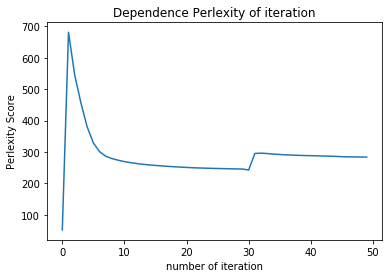

In [50]:
perplexity_plot(reg_model, score_name='PerlexityScore_ngram')

In [51]:
metrics_reg.loc[metrics_reg['roc_auc'] > 0.85]

,tau_Smooth_Phi00_ngram,tau_Smooth_Phi00_info,tau_Smooth_Phi00_specificity,tau_SparsePhi_ngram,tau_SparsePhi_info,tau_SparsePhi_specificity,tau_SparseTheta,tau_DecorrelatorPhi_ngram,tau_DecorrelatorPhi_info,tau_DecorrelatorPhi_specificity,roc_auc,precision,recall,accuracy
0,2830.0,0.0,0.0,2.3,-33.0,0.0,-1.16,120.0,102.6,0.0,0.855956,0.728232,0.830075,0.785474


In [52]:
metrics_reg['roc_auc']

0    0.855956
Name: roc_auc, dtype: float64

# Построим лучшую модель с лучшими параметрами

In [53]:
tau_SparsePhi_ngram = 2.3
tau_SparsePhi_info = -33
tau_SparsePhi_specificity = 0
tau_SparseTheta = -1.16
tau_DecorrelatorPhi_ngram = 120
tau_DecorrelatorPhi_info = 102.6
tau_DecorrelatorPhi_specificity = 0
tau_Smooth_Phi00_ngram = 2830
tau_Smooth_Phi00_info = 0
tau_Smooth_Phi00_specificity = 0

In [54]:
reg_best_model = best_first_model.clone()

In [55]:
reg_best_model.scores.add(artm.TopicMassPhiScore(name='TopicMassPhiScore', model_name=reg_model.model_nwt))

In [56]:
# Декоррелирование Ф11_ngram
reg_best_model.regularizers.add(artm.DecorrelatorPhiRegularizer(name='sp_DecorrelatorPhiRegularizer_ngram',
                                                       class_ids=['@ngram'],
                                                       topic_names=specific_topics))
# Декоррелирование Ф11_info
reg_best_model.regularizers.add(artm.DecorrelatorPhiRegularizer(name='sp_DecorrelatorPhiRegularizer_info',
                                                       class_ids=['@info'],
                                                       topic_names=specific_topics))
# Декоррелирование Ф_specificity
reg_best_model.regularizers.add(artm.DecorrelatorPhiRegularizer(name='sp_DecorrelatorPhiRegularizer_specificity',
                                                       class_ids=['@specificity']))

# Разреживание Тета11
reg_best_model.regularizers.add(artm.SmoothSparseThetaRegularizer(name='sp_SparseThetaRegularizer',
                                                         topic_names=specific_topics,
                                                         doc_titles=list(map(lambda item: str(item),
                                                                             train_d1_indices))))
# Разреживание Ф11_ngram
reg_best_model.regularizers.add(artm.SmoothSparsePhiRegularizer(name='sp_SparsePhiRegularizer_ngram',
                                                       class_ids=['@ngram'],
                                                       topic_names=specific_topics))
# Разреживание Ф11_info
reg_best_model.regularizers.add(artm.SmoothSparsePhiRegularizer(name='sp_SparsePhiRegularizer_info',
                                                       class_ids=['@info'],
                                                       topic_names=specific_topics))
# Разреживание Ф11_specificity
reg_best_model.regularizers.add(artm.SmoothSparsePhiRegularizer(name='sp_SparsePhiRegularizer_specificity',
                                                       class_ids=['@specificity'],
                                                       topic_names=specific_topics))

In [57]:
reg_best_model.regularizers['sp_SparsePhiRegularizer_ngram'].tau = tau_SparsePhi_ngram
reg_best_model.regularizers['sp_SparsePhiRegularizer_info'].tau = tau_SparsePhi_info
reg_best_model.regularizers['sp_SparsePhiRegularizer_specificity'].tau = tau_SparsePhi_specificity
reg_best_model.regularizers['sp_SparseThetaRegularizer'].tau = tau_SparseTheta
reg_best_model.regularizers['sp_DecorrelatorPhiRegularizer_ngram'].tau = tau_DecorrelatorPhi_ngram
reg_best_model.regularizers['sp_DecorrelatorPhiRegularizer_info'].tau = tau_DecorrelatorPhi_info
reg_best_model.regularizers['sp_DecorrelatorPhiRegularizer_specificity'].tau = tau_DecorrelatorPhi_specificity

reg_best_model.regularizers['Smooth_Phi00_Regularizer_ngram'].tau = tau_Smooth_Phi00_ngram
reg_best_model.regularizers['Smooth_Phi00_Regularizer_info'].tau = tau_Smooth_Phi00_info
reg_best_model.regularizers['Smooth_Phi00_Regularizer_specificity'].tau = tau_Smooth_Phi00_specificity

reg_best_model.fit_offline(batch_vectorizer=train_total_batch_vectorizer, num_collection_passes=20)


p_cd_test = reg_best_model.transform(batch_vectorizer=test_total_batch_vectorizer,
                                predict_class_id='@specificity')

y_pred_proba = p_cd_test.loc['1']
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

dist_min = math.inf
for x, y, treshold in zip(fpr, tpr, thresholds):
    if euclidean([0, 1], [x, y]) < dist_min:
        T_artm = treshold
        dist_min = euclidean([0, 1], [x, y])
        x_artm = x
        y_artm = y

y_pred_labels = []
for document in p_cd_test.columns:
    if p_cd_test[document].loc['1'] >= T_artm:
        y_pred_labels.append(1)
    else:
        y_pred_labels.append(0)

roc_auc = roc_auc_score(y_test, y_pred_proba)
precision = precision_score(y_test, y_pred_labels)
recall = recall_score(y_test, y_pred_labels)
accuracy = accuracy_score(y_test, y_pred_labels)

In [58]:
topic_model = TopicModel(reg_best_model)
topic_model.describe_scores()

last_value
model_id                   score_name                                 
--01h44m14s_12d06m2020y--- PerlexityScore_ngram                283.632
                           PerlexityScore_info                 57.6362
                           PerlexityScore_specificity          1.02965
                           SparsityPhiScore_ngram             0.141178
                           SparsityPhiScore_info              0.596943
                           SparsityThetaScore                  0.27679
                           TopTokensScore.average_coherence          0
                           TopTokensScore.num_tokens               110
                           BackgroundTokensRatioScore         0.575149
                           TopicMassPhiScore                         1

In [59]:
print('roc_auc', roc_auc)
print('precision', precision)
print('recall', recall)
print('accuracy', accuracy)

roc_auc 0.8559555823866234
precision 0.7282321899736148
recall 0.8300751879699249
accuracy 0.7854741089441829


# Вычисляем специфичность документов и слов

In [60]:
from sklearn.feature_extraction.text import CountVectorizer

def frequency_matrix(data, phi):
    vocabulary = train_total_dict_ngram
    
    corpus = data['ngram_as_str']
    vectorizer = CountVectorizer(vocabulary=vocabulary)
    X = vectorizer.fit_transform(corpus)

    matrix = pd.DataFrame(X.toarray())
    matrix.index=list(map(lambda item: str(item), data['id']))
    matrix.columns=vectorizer.get_feature_names()
    
    return matrix

In [61]:
def specifisity_of_document(doc_title, specific_topics, theta):
    specifisity_of_doc = 0
    for topic in specific_topics:
        specifisity_of_doc+=theta.loc[topic][doc_title]
    return specifisity_of_doc

In [62]:
def specifisity_of_token(token, specific_topics, matrix_of_frequancies, theta, phi):
    specifisity_of_t = 0
    for topic in specific_topics:
        n_topic = n_t(topic, theta)
        n_word = n_w(token, matrix_of_frequancies, theta)
        specifisity_of_t += phi.loc[token][topic] * n_topic / n_word
    return specifisity_of_t

def n_w(token, matrix_of_frequancies, theta):
    return matrix_of_frequancies.loc[theta.columns][token].sum()

# def n_t(topic, theta):
#     columns = theta.columns
#     n_d_list = matrix_of_frequancies.loc[columns].sum(axis=1)
#     theta_h = theta.loc[topic][columns]
#     n = sum(list(map(lambda t: t[0]*t[1], zip(theta_h,n_d_list))))
#     return n

def n_t(topic, theta):
    return reg_best_model.score_tracker['TopicMassPhiScore'].last_topic_mass[topic]

In [63]:
import time
import random

def get_arrangement_permutation(dist, mode):
    """Returns best permutation of topics for topics spectrum.
    Args:
        dist: Matrix [N_topics, N_topics] of distances between topics.
        mode: What algorith to use.
            String, one of:
                "none" - returns identity permutation;
                "tsne" - builds tSNE embedding from topic space to R^1 (line),
                    returns order of topics' projections.
    Returns:
        Permutation - a list of length N_topics, with unique integers between 0
        and N_topics-1. This permutations should be applied to topics as
        columns of phi to obtain a spectrum.
    """
    start_time = time.time()

    if mode == "none":
        return [i for i in range(dist.shape[0])]
    elif mode == "tsne":
        from sklearn.manifold import TSNE
        tsne_model = TSNE(n_components=1, random_state=0, metric="precomputed")
        tsne_result = tsne_model.fit_transform(dist).reshape(-1)
        perm = np.argsort(tsne_result)

    return list(perm)

In [64]:
best_colors = [
    (0.02, 0.00, 0.42),
    (0.45, 0.60, 0.50),
    (0.90, 0.0, 0.0),
    (0.43, 0.45, 0.50),
    (0.65, 0.33, 0.55),
    (0.78, 0.40, 0.61),
    (0.66, 0.40, 0.78),
    (0.40, 0.58, 0.78),
    (0.78, 0.47, 0.40),
    (0.4, 0.78, 0.57),
    (0.0, 0.5, 0.73),
    (0.0, 0.74, 0.99),
    (0.93, 0.99, 0.0),
]

## Специфичность документов

In [65]:
TopTokensViewer(model=topic_model).view_from_jupyter()

/home/polina/anaconda3/lib/python3.7/site-packages/topicnet/viewers/top_tokens_viewer.py:33: UserWarning:

num_top_tokens greater than modality size



topic_0 modality token 
 
 @info 
 &РЕЗУЛЬТАТ_Да,_четко 
 2.881690 
 
 
 &ПРЕГРАДЫ_Не_вижу_преград 
 2.059040 
 
 
 &ВРЕМЕННЫЕ_ГРАНИЦЫ_Нет_жестких_сроков 
 1.482630 
 
 
 &ОСНОВНОЙ_ВИД_ДЕЙТЕЛЬНОСТИ_Работаю_в_организации,_предприятии 
 1.403820 
 
 
 &ОБЛАСТЬ_ЦЕЛИ_Личные_финансы,_работа,_бизнес_и_нормативное_регулирование 
 1.388830 
 
 
 &ТИП_ЦЕЛИ_Приобрести_новые_навыки 
 1.369170 
 
 
 &ТИП_ЦЕЛИ_другое 
 1.363650 
 
 
 &ТИП_ЦЕЛИ_Развить_имеющиеся_знания_и_навыки 
 1.170020 
 
 
 &ПРЕГРАДЫ_есть_преграды 
 1.155370 
 
 
 &ТИП_ЦЕЛИ_Получить_знания_в_новой_области 
 1.141170 
 
 topic_0 modality token 
 
 @ngram 
 новый 
 2.489860 
 
 
 знание 
 2.371850 
 
 
 навык 
 1.505040 
 
 
 компетенция 
 1.482100 
 
 
 повышение 
 1.438780 
 
 
 уровень 
 1.246590 
 
 
 приобретение 
 0.943220 
 
 
 умение 
 0.933360 
 
 
 знание_умение 
 0.598200 
 
 
 сфера 
 0.519090 
 
 topic_0 modality token 
 
 @specificity 
 0 
 42.507110 
 
 
 1 
 -0.000000

topic_1 modality token 
 
 @info 
 &РЕЗУЛЬТАТ_Да,_четко 
 4.020990 
 
 
 &ПРЕГРАДЫ_Не_вижу_преград 
 2.487890 
 
 
 &ТИП_ЦЕЛИ_Получить_знания_в_новой_области 
 1.749550 
 
 
 &ТИП_ЦЕЛИ_Приобрести_новые_навыки 
 1.501690 
 
 
 &ПРЕГРАДЫ_есть_преграды 
 1.490290 
 
 
 &ВРЕМЕННЫЕ_ГРАНИЦЫ_Нет_жестких_сроков 
 1.412880 
 
 
 &ТИП_ЦЕЛИ_Развить_имеющиеся_знания_и_навыки 
 1.385020 
 
 
 &ПЕРВЫЙ_ШАГ_знаю_с_чего_начать 
 1.338140 
 
 
 &ТИП_ЦЕЛИ_другое 
 1.188690 
 
 
 &ОСНОВНОЙ_ВИД_ДЕЙТЕЛЬНОСТИ_Работаю_в_организации,_предприятии 
 1.165050 
 
 topic_1 modality token 
 
 @ngram 
 знание 
 5.093150 
 
 
 новое 
 2.292250 
 
 
 получение 
 2.194630 
 
 
 получить 
 1.320880 
 
 
 получение_новый 
 1.004350 
 
 
 новый 
 0.991410 
 
 
 навык 
 0.946350 
 
 
 новое_знание 
 0.860740 
 
 
 новый_знание 
 0.798290 
 
 
 стать 
 0.757400 
 
 topic_1 modality token 
 
 @specificity 
 0 
 42.456200 
 
 
 1 
 -0.000000

topic_2 modality token 
 
 @info 
 &РЕЗУЛЬТАТ_Да,_четко 
 2.880460 
 
 
 &ПРЕГРАДЫ_Не_вижу_преград 
 2.737850 
 
 
 &ТИП_ЦЕЛИ_другое 
 2.342750 
 
 
 &ПЕРВЫЙ_ШАГ_знаю_с_чего_начать 
 1.469270 
 
 
 &ВРЕМЕННЫЕ_ГРАНИЦЫ_Нет_жестких_сроков 
 1.412040 
 
 
 &ТИП_ЦЕЛИ_Развить_имеющиеся_знания_и_навыки 
 1.385480 
 
 
 &ТИП_ЦЕЛИ_Приобрести_новые_навыки 
 1.340510 
 
 
 &ОСНОВНОЙ_ВИД_ДЕЙТЕЛЬНОСТИ_Работаю_в_организации,_предприятии 
 1.334820 
 
 
 &ОБЛАСТЬ_ЦЕЛИ_Универсальные_компетенции,_гибкие_навыки_(soft_skills) 
 1.319800 
 
 
 &ТИП_ЦЕЛИ_Получить_знания_в_новой_области 
 1.278110 
 
 topic_2 modality token 
 
 @ngram 
 развитие 
 2.076740 
 
 
 свой 
 1.678940 
 
 
 расширение 
 0.992080 
 
 
 рост 
 0.903840 
 
 
 кругозор 
 0.771160 
 
 
 профессиональный 
 0.606440 
 
 
 возможность 
 0.536510 
 
 
 познание 
 0.505340 
 
 
 личностный 
 0.485170 
 
 
 расширить 
 0.483260 
 
 topic_2 modality token 
 
 @specificity 
 0 
 42.436140 
 
 
 1 
 -0.000000

topic_3 modality token 
 
 @info 
 &РЕЗУЛЬТАТ_Да,_четко 
 2.416000 
 
 
 &ОБЛАСТЬ_ЦЕЛИ_Математика_и_IT 
 1.692890 
 
 
 &ПРЕГРАДЫ_есть_преграды 
 1.573750 
 
 
 &ПОДОБЛАСТЬ_ЦЕЛИ_Программирование_и_освоение_компьютерных_программ 
 1.504150 
 
 
 &ТИП_ЦЕЛИ_Приобрести_новые_навыки 
 1.450960 
 
 
 &ПРЕГРАДЫ_Не_вижу_преград 
 1.443470 
 
 
 &ВРЕМЕННЫЕ_ГРАНИЦЫ_Нет_жестких_сроков 
 1.391160 
 
 
 &ТИП_ЦЕЛИ_другое 
 1.344050 
 
 
 &ТИП_ЦЕЛИ_Получить_знания_в_новой_области 
 1.293650 
 
 
 &ПОДОБЛАСТЬ_ЦЕЛИ_Работа_с_данными 
 1.271660 
 
 topic_3 modality token 
 
 @ngram 
 работа 
 0.974540 
 
 
 большой 
 0.904610 
 
 
 узнать 
 0.893530 
 
 
 новое 
 0.834780 
 
 
 человек 
 0.689720 
 
 
 узнать_новое 
 0.539890 
 
 
 хотеть 
 0.482580 
 
 
 знать 
 0.473910 
 
 
 самообразование 
 0.454600 
 
 
 интересный 
 0.424180 
 
 topic_3 modality token 
 
 @specificity 
 0 
 42.250030 
 
 
 1 
 -0.000000

topic_4 modality token 
 
 @info 
 &РЕЗУЛЬТАТ_Да,_четко 
 2.012180 
 
 
 &СФЕРА_ЗАНЯТОСТИ_Образование 
 1.668680 
 
 
 &ВРЕМЕННЫЕ_ГРАНИЦЫ_Нет_жестких_сроков 
 1.015630 
 
 
 &ОСНОВНОЙ_ВИД_ДЕЙТЕЛЬНОСТИ_Работаю_в_организации,_предприятии 
 0.859550 
 
 
 &РЕЗУЛЬТАТ_Да,_нечетко 
 0.835540 
 
 
 &ПРЕГРАДЫ_Не_вижу_преград 
 0.684570 
 
 
 &ТИП_ЦЕЛИ_другое 
 0.541370 
 
 
 &ТИП_ЦЕЛИ_Развить_имеющиеся_знания_и_навыки 
 0.507270 
 
 
 &ПРЕГРАДЫ_есть_преграды 
 0.478070 
 
 
 &ПЕРВЫЙ_ШАГ_знаю_с_чего_начать 
 0.303030 
 
 topic_4 modality token 
 
 @ngram 
 профессиональный 
 0.774020 
 
 
 навык 
 0.321640 
 
 
 компетенция 
 0.225030 
 
 
 развитие 
 0.195520 
 
 
 повышение 
 0.135620 
 
 
 повышение_профессиональный 
 0.117420 
 
 
 профессиональный_уровень 
 0.107760 
 
 
 сфера 
 0.091310 
 
 
 профессиональный_компетенция 
 0.085060 
 
 
 курс 
 0.083480 
 
 topic_4 modality token 
 
 @specificity 
 1 
 11.446930 
 
 
 0 
 -0.000000

topic_5 modality token 
 
 @info 
 &РЕЗУЛЬТАТ_Да,_четко 
 1.915450 
 
 
 &ПРЕГРАДЫ_есть_преграды 
 1.575210 
 
 
 &ОБЛАСТЬ_ЦЕЛИ_Иностранные_языки,_гуманитарные_знания_и_навыки 
 1.038390 
 
 
 &ПОДОБЛАСТЬ_ЦЕЛИ_Иностранные_языки 
 0.851620 
 
 
 &ПЕРВЫЙ_ШАГ_знаю_с_чего_начать 
 0.786030 
 
 
 &ТИП_ЦЕЛИ_Приобрести_новые_навыки 
 0.548870 
 
 
 &ПРЕГРАДЫ_Не_вижу_преград 
 0.504540 
 
 
 &ТИП_ЦЕЛИ_Развить_имеющиеся_знания_и_навыки 
 0.504260 
 
 
 &ТИП_ЦЕЛИ_Получить_знания_в_новой_области 
 0.475390 
 
 
 &ТИП_ЦЕЛИ_другое 
 0.396490 
 
 topic_5 modality token 
 
 @ngram 
 язык 
 0.699660 
 
 
 английский 
 0.456550 
 
 
 английский_язык 
 0.288770 
 
 
 выучить 
 0.279950 
 
 
 программирование 
 0.173700 
 
 
 изучить 
 0.151010 
 
 
 изучение 
 0.128740 
 
 
 уровень 
 0.121760 
 
 
 иностранный 
 0.106280 
 
 
 иностранный_язык 
 0.102370 
 
 topic_5 modality token 
 
 @specificity 
 1 
 11.421330 
 
 
 0 
 -0.000000

topic_6 modality token 
 
 @info 
 &ТИП_ЦЕЛИ_другое 
 1.516060 
 
 
 &РЕЗУЛЬТАТ_Да,_четко 
 1.412700 
 
 
 &ТИП_ЦЕЛИ_Включиться_в_новый_проект/деятельность 
 1.260960 
 
 
 &ПРЕГРАДЫ_Не_вижу_преград 
 1.022950 
 
 
 &ТИП_ЦЕЛИ_Приобрести_новые_навыки 
 0.850230 
 
 
 &ТИП_ЦЕЛИ_Развить_имеющиеся_знания_и_навыки 
 0.631240 
 
 
 &ТИП_ЦЕЛИ_Получить_знания_в_новой_области 
 0.573440 
 
 
 &ПРЕГРАДЫ_есть_преграды 
 0.568540 
 
 
 &ПЕРВЫЙ_ШАГ_знаю_с_чего_начать 
 0.527960 
 
 
 &РЕЗУЛЬТАТ_Да,_нечетко 
 0.461180 
 
 topic_6 modality token 
 
 @ngram 
 стать 
 0.439220 
 
 
 специалист 
 0.187930 
 
 
 управление 
 0.149930 
 
 
 свой 
 0.135110 
 
 
 бизнес 
 0.103100 
 
 
 профессионал 
 0.082320 
 
 
 цифровой 
 0.079930 
 
 
 сфера 
 0.078400 
 
 
 область 
 0.069110 
 
 
 проектный 
 0.063220 
 
 topic_6 modality token 
 
 @specificity 
 1 
 11.392640 
 
 
 0 
 -0.000000

topic_7 modality token 
 
 @info 
 &РЕЗУЛЬТАТ_Да,_четко 
 1.462500 
 
 
 &ОБРАЗОВАНИЕ_Высшее_образование 
 1.384600 
 
 
 &ОБЛАСТЬ_ЦЕЛИ_другое 
 0.974490 
 
 
 &ПРЕГРАДЫ_Не_вижу_преград 
 0.943050 
 
 
 &ОСНОВНОЙ_ВИД_ДЕЙТЕЛЬНОСТИ_Работаю_в_организации,_предприятии 
 0.839260 
 
 
 &ТИП_ЦЕЛИ_Приобрести_новые_навыки 
 0.787110 
 
 
 &ВРЕМЕННЫЕ_ГРАНИЦЫ_Нет_жестких_сроков 
 0.706110 
 
 
 &РЕЗУЛЬТАТ_Да,_нечетко 
 0.464470 
 
 
 &ТИП_ЦЕЛИ_Развить_имеющиеся_знания_и_навыки 
 0.419220 
 
 
 &ТИП_ЦЕЛИ_Получить_знания_в_новой_области 
 0.416630 
 
 topic_7 modality token 
 
 @ngram 
 уровень 
 0.372030 
 
 
 повышение 
 0.310590 
 
 
 повысить 
 0.251680 
 
 
 научиться 
 0.241190 
 
 
 квалификация 
 0.141600 
 
 
 свой 
 0.104620 
 
 
 повышение_квалификация 
 0.078900 
 
 
 повысить_уровень 
 0.069200 
 
 
 повышение_уровень 
 0.066600 
 
 
 повысить_свой 
 0.056950 
 
 topic_7 modality token 
 
 @specificity 
 1 
 11.307060 
 
 
 0 
 -0.000000

topic_8 modality token 
 
 @info 
 &РЕЗУЛЬТАТ_Да,_четко 
 2.530830 
 
 
 &ПРЕГРАДЫ_Не_вижу_преград 
 2.155920 
 
 
 &ТИП_ЦЕЛИ_Получить_официальное_образование_(с_дипломом) 
 1.070310 
 
 
 &ПЕРВЫЙ_ШАГ_знаю_с_чего_начать 
 0.732440 
 
 
 &ТИП_ЦЕЛИ_другое 
 0.723170 
 
 
 &ТИП_ЦЕЛИ_Развить_имеющиеся_знания_и_навыки 
 0.552290 
 
 
 &ТИП_ЦЕЛИ_Получить_знания_в_новой_области 
 0.545720 
 
 
 &ТИП_ЦЕЛИ_Приобрести_новые_навыки 
 0.542820 
 
 
 &ВРЕМЕННЫЕ_ГРАНИЦЫ_есть_границы 
 0.473760 
 
 
 &ОБЛАСТЬ_ЦЕЛИ_Спорт,_ЗОЖ,_внешность_и_самочувствие 
 -0.000000 
 
 topic_8 modality token 
 
 @ngram 
 получить 
 0.634840 
 
 
 образование 
 0.510960 
 
 
 высокий 
 0.242160 
 
 
 диплом 
 0.163590 
 
 
 высокий_образование 
 0.143870 
 
 
 получить_высокий 
 0.120880 
 
 
 получить_диплом 
 0.107280 
 
 
 степень 
 0.080630 
 
 
 управленческий 
 0.056360 
 
 
 получить_образование 
 0.054880 
 
 topic_8 modality token 
 
 @specificity 
 1 
 11.355660 
 
 
 0 
 -0.000000

topic_9 modality token 
 
 @info 
 &РЕЗУЛЬТАТ_Да,_четко 
 3.168000 
 
 
 &ТИП_ЦЕЛИ_другое 
 1.981110 
 
 
 &ПРЕГРАДЫ_есть_преграды 
 1.569620 
 
 
 &ВРЕМЕННЫЕ_ГРАНИЦЫ_есть_границы 
 1.325050 
 
 
 &ОСНОВНОЙ_ВИД_ДЕЙТЕЛЬНОСТИ_Работаю_в_организации,_предприятии 
 0.879240 
 
 
 &ПЕРВЫЙ_ШАГ_знаю_с_чего_начать 
 0.757380 
 
 
 &ПОДОБЛАСТЬ_ЦЕЛИ_Новое_место_работы 
 -0.000000 
 
 
 &СФЕРА_ЗАНЯТОСТИ_Нефтегазовая_промышленность 
 -0.000000 
 
 
 &ТИП_ЦЕЛИ_Включиться_в_новый_проект/деятельность 
 -0.000000 
 
 
 &ТИП_ЦЕЛИ_Получить_знания_в_новой_области 
 -0.000000 
 
 topic_9 modality token 
 
 @ngram 
 диссертация 
 0.154980 
 
 
 карьерный 
 0.136300 
 
 
 рост 
 0.112650 
 
 
 окончить 
 0.106560 
 
 
 защитить 
 0.099580 
 
 
 вуз 
 0.090540 
 
 
 карьерный_рост 
 0.089800 
 
 
 докторский 
 0.086370 
 
 
 дать 
 0.077670 
 
 
 докторский_диссертация 
 0.077540 
 
 topic_9 modality token 
 
 @specificity 
 1 
 11.375610 
 
 
 0 
 -0.000000

topic_10 modality token 
 
 @info 
 &РЕЗУЛЬТАТ_Да,_четко 
 2.745220 
 
 
 &ПРЕГРАДЫ_Не_вижу_преград 
 1.695270 
 
 
 &ПЕРВЫЙ_ШАГ_знаю_с_чего_начать 
 0.977100 
 
 
 &ТИП_ЦЕЛИ_другое 
 0.904100 
 
 
 &ПРЕГРАДЫ_есть_преграды 
 0.665000 
 
 
 &ТИП_ЦЕЛИ_Развить_имеющиеся_знания_и_навыки 
 0.626210 
 
 
 &ОСНОВНОЙ_ВИД_ДЕЙТЕЛЬНОСТИ_Учусь_в_вузе_(очная_форма_обучения) 
 0.572490 
 
 
 &ТИП_ЦЕЛИ_Получить_знания_в_новой_области 
 0.424640 
 
 
 &ВРЕМЕННЫЕ_ГРАНИЦЫ_есть_границы 
 0.337360 
 
 
 &ТИП_ЦЕЛИ_Получить_официальное_образование_(с_дипломом) 
 0.263510 
 
 topic_10 modality token 
 
 @ngram 
 закончить 
 0.293790 
 
 
 работа 
 0.202110 
 
 
 обучение 
 0.188320 
 
 
 университет 
 0.150790 
 
 
 год 
 0.099430 
 
 
 закончить_университет 
 0.081330 
 
 
 книга 
 0.056400 
 
 
 научный 
 0.054810 
 
 
 пройти 
 0.052890 
 
 
 технология 
 0.049540 
 
 topic_10 modality token 
 
 @specificity 
 1 
 11.306300 
 
 
 0 
 -0.000000

In [66]:
dataset = Dataset('preprocessed_data_for_TopicNet.csv')

In [67]:
TopDocumentsViewer(model=topic_model, dataset=dataset, max_top_number=10).view_from_jupyter()

Topic name: topic_0 1614 Сохранение гибкости и свежести разума путем его снабжения разнообразными инструментами. 2861 приобретение знаний, умений и навыков в оп­ределенной области науки. 2237 Наращивание компетенций для решения задач. 3402 углубление знаний и приобретение новых навыков в упраленческой сфере. 485 приобретение знаний, умений и навыков в оп­ределенной области. 5316 Решение конкретных задач (те задачи, над которыми я работаю прямо сейчас). 4775 Приобретение новых знаний, умений и навыков в оп­ределенной области науки. 5765 Приобретение новой специализации в основной проф.деятельности. 3976 Приобретение навыков, необходимых для финансовой и эмоциональной независимости. 2762 Постоянно повышать уровень моих знаний и компетенций. Topic name: topic_1 847 Получить новые знания. Запомнить новые ФИО, даты, понятия, определения. 4018 Получить новые знания и навыки в области преподаваемых дисциплин. 1779 Получить новые знания по интересующей теме. 1435 Получить новые знания в интересующих меня областях. 232 Понимание процессов изменений во внешней среде.. 3809 получить новые знания, которые пригодятся мне в дальнейшем. 1328 Знание - сила. Цель стать сильнее.. 4755 Получить удовлетворение от процесса получения новых знагий. 678 Понимание процессов изменений во внешней среде.. 206 Понимание процессов изменений во внешней среде.. Topic name: topic_2 5896 обновить свои soft-skills и hard-skills, упущенные во время декретного отпуска. 3128 научиться строить четкую картину мира пронизывая своими мыслями все окружающее пространство. 2073 Первая - абстрактная достаточно. Научиться понимать то, что мне на самом деле нужно делать, чтобы забустить себя, чтобы не тратить кучу времени впустую. 4065 Расширить свой кругозор и свои возможности. 5012 Духовное развитие и познание себя для улучшения качества жизни моей и окружающих меня близких и друзей. 234 Развитие мышления и расширение кругозора. 108 Идти в ногу с развитием общества. 2689 Достижение своих поставленных целей. 3363 Достижение своих поставленных целей. 3220 познать то, что я положу в основу моего карьерного роста. Topic name: topic_3 1313 Совершенствоваться в том, что мне нравится и у меня это хорошо получается. Ведь если это мне нравится и само хорошо получается, то если в этом еще и развиваться, то это просто бомба!. 3494 Узнать больше об окружающем меня мире, о том, как он устроен и на каких законах работает.. 3344 Делиться и перенимать опыт в команде с активными, ответственными, думающими людьми объединенных на запланированный результат. . 4545 Чем больше знаю я, тем больше знают мои ученики. 2331 Каждый день общаться с умными/интересными людьми. 5151 Найти работу по специальности экономист после шестилетнего перерыва.. 5305 Побывать на побережье в Калифорнии, посмотреть закат над Тихим океаном. 2018 Мир современных информационных технологий постоянно совершенствуется, хочется быть в курсе всего нового.. 5215 Максимальная адаптация к меняющимся реалиям рынка труда. 4730 Уметь отбирать из общей массы наиболее полезное - будущее за эффективными технологиями и методами работы с ними.. Topic name: topic_4 2477 совершенствовать навык публичных выступлений и преодолеть страх перед аудиторией. 3243 Развитие профессиональных навыков и компетенций (Business development). 1049 развитие уже имеющихся навыков в сферах профессиональной компетенции. 2329 Развитие профессиональный навыков в сфере туризма. 24 Развитие профессиональных качеств и навыков. 4137 Разработать лекарственный препарат для терапии гепатита B. 474 Постоянное совершенствование в профессиональной сфере. 4520 Улучшить навыки публичных выступлений. 3085 Укрепление и развитие профессиональных качеств. 2508 Развитие профессиональных навыков. Topic name: topic_5 970 Изучение английского языка до уровня Effective operational proficiency or advanced. 4004 Изучить английский язык до свободного беглого общения. 4797 Изучить английский язык до уровня не ниже upper intermediate. 655 Выучить иностранный язык - английский, уровен

In [68]:
phi = reg_best_model.get_phi()
theta = reg_best_model.get_theta()

In [69]:
topic_description = pd.DataFrame(index = theta.index, columns = ['description'])
topic_description.loc['topic_0']['description'] = '(не конкретно)'
topic_description.loc['topic_1']['description'] = '(не конкретно)'
topic_description.loc['topic_2']['description'] = '(не конкретно)'
topic_description.loc['topic_3']['description'] = '(не конкретно)'
topic_description.loc['topic_4']['description'] = 'Получить высшее образование'
topic_description.loc['topic_5']['description'] = 'Развить гибкие навыки'
topic_description.loc['topic_6']['description'] = 'Создать свой проект'
topic_description.loc['topic_7']['description'] = 'Решение конкретной практической задачи'
topic_description.loc['topic_8']['description'] = 'Изучить иностранный язык'
topic_description.loc['topic_9']['description'] = 'Повысить свой профессиональный уровень'
topic_description.loc['topic_10']['description'] = 'Защита докторской диссертации'

In [70]:
doc_titles = list(map(lambda item: str(item), train_d0_indices))
specifisity = pd.DataFrame(index=doc_titles, columns=['topic', 'specifisity'])
for doc_title in doc_titles:
    s_d = specifisity_of_document(doc_title, specific_topics, theta)
    specifisity.loc[doc_title]['specifisity'] = s_d
    specifisity.loc[doc_title]['topic'] = theta[theta[doc_title] == theta[doc_title].max()].index.tolist()[0]

In [71]:
topics_vec = [phi[topic].values for topic in phi.columns]
dist_matrix = cosine_similarity(topics_vec, topics_vec)
topic_spectrum = get_arrangement_permutation(dist_matrix, 'tsne')

In [72]:
from matplotlib.projections import PolarAxes

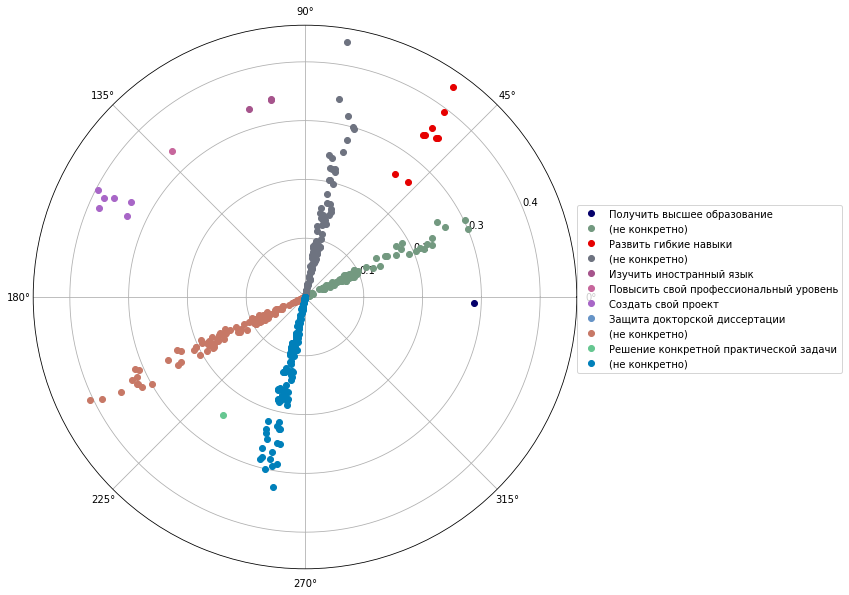

In [73]:
plt.figure(figsize=(10, 10))
for idx, color in zip(topic_spectrum, best_colors):
    topic = 'topic_' + str(idx)
    goals = specifisity.loc[specifisity['topic'] == topic]
    
    plt.polar(np.ones(goals.shape[0]) * topic_spectrum.index(idx) * np.pi / 7. + np.random.uniform(-0.07, 0.07, goals.shape[0]), 
              goals['specifisity'], 'ro', label=topic_description.loc[topic]['description'], color=color)
lgd = plt.legend(bbox_to_anchor=(1., 0.67), loc='upper left', borderaxespad=0.)
plt.savefig('images/total_specifisity_d1.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.savefig('images/total_specifisity_d1.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

In [74]:
#fig, ax = plt.subplots(figsize=[4.8, 4.8], projection="polar")
fig, ax = plt.subplot(figsize=(10, 10), projection="polar")

tr = PolarAxes.PolarTransform(use_rmin=True)
ax.set_rmin(1)

AttributeError: 'PolarAxesSubplot' object has no property 'figsize'

<Figure size 432x288 with 0 Axes>

## Специфичность слов

In [ ]:
data = pd.read_csv('data_for_specifisity_calculations.csv')
data.index=data['id']

In [ ]:
data['lemmatized_as_str'].fillna('', inplace=True)
data['bigram_as_str'].fillna('', inplace=True)
data['info_as_str'].fillna('', inplace=True)

In [ ]:
data['lemmatized'] = [s.split() for s in data['lemmatized_as_str']]
data['bigram'] = [s.split() for s in data['bigram_as_str']]
data['info'] = [s.split() for s in data['info_as_str']]

In [ ]:
data['ngram'] = [goal['lemmatized'] + goal['bigram'] + goal['info'] for index, goal in data.iterrows()]
data['ngram_as_str'] = [' '.join(l) for l in data['ngram']]

In [ ]:
matrix_of_frequancies = frequency_matrix(data, phi)

In [ ]:
tokens = train_total_dict_ngram
specifisity_words = pd.DataFrame(index=list(tokens), columns=['topic', 'specifisity'])
for token in tokens:
    s_w = specifisity_of_token(token, specific_topics, matrix_of_frequancies, theta, phi)
    specifisity_words.loc[token]['specifisity'] = s_w
    specifisity_words.loc[token]['topic'] = phi.T[phi.T[token] == phi.T[token].max()].index.tolist()[0]

In [ ]:
specifisity_words

In [ ]:
plt.figure(figsize=(10, 10))
for idx, color in zip(topic_spectrum, best_colors):
    topic = 'topic_' + str(idx)
    tokens = specifisity_words.loc[specifisity_words['topic'] == topic]
    
    plt.polar(np.ones(tokens.shape[0]) * topic_spectrum.index(idx) * np.pi / 7. + np.random.uniform(-0.07, 0.07, tokens.shape[0]), 
              tokens['specifisity'], 'ro', label=topic_description.loc[topic]['description'], color=color)
lgd = plt.legend(bbox_to_anchor=(1., 0.67), loc='upper left', borderaxespad=0.)
plt.savefig('images/specifisity_words.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.savefig('images/specifisity_words.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()